Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/Data/'

Mounted at /content/drive


Loading the Auto DataSet

In [3]:
auto = pd.read_csv(data_folder+'Auto.csv', usecols=[0,1,2,3,4,5,6,7]) #skipping 8th col ie name from the analysis
auto.info()
auto.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#Answers
1.1 - Here in Auto.csv - the dependent or target variable is 'mpg' whereas all other variables like cylinders, displacement,horsepower,weight, acceleration, year & origin will be independent variable - contributing & defining the outcome/target ie 'mpg'.
Yes 'name' column describing as vehicle name should not be considered for running correlation OR regression, as the variable is in non numeric form & the name variable **does not contribute** to the value of mpg variable, Therefore name variable should be dropped from regression analysis(Not a categorical & numeric variable).

2.2 - 
a. Numeric variables are as - displacement, weight, acceleration, cylinders, As they are contributing to the value of mpg but not defining or dividing the value of mpg.

whereas 

b. Categorical Variables are as - 'Origin' with 1(American), 2(European), 3(Japanese), as the variable origin assigned as 1,2 & 3 is defining/dividing the value of mpg - region wise or into 3 categories but not contributing towards the value of mpg & variable 'Year'

Note - need to convert horsepower to numeric


## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

In [4]:
#Converting Object Datatype to Float then Int
from IPython.core import error
auto['horsepower']=pd.to_numeric(auto['horsepower'], errors='coerce').astype('Int64')
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        Int64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

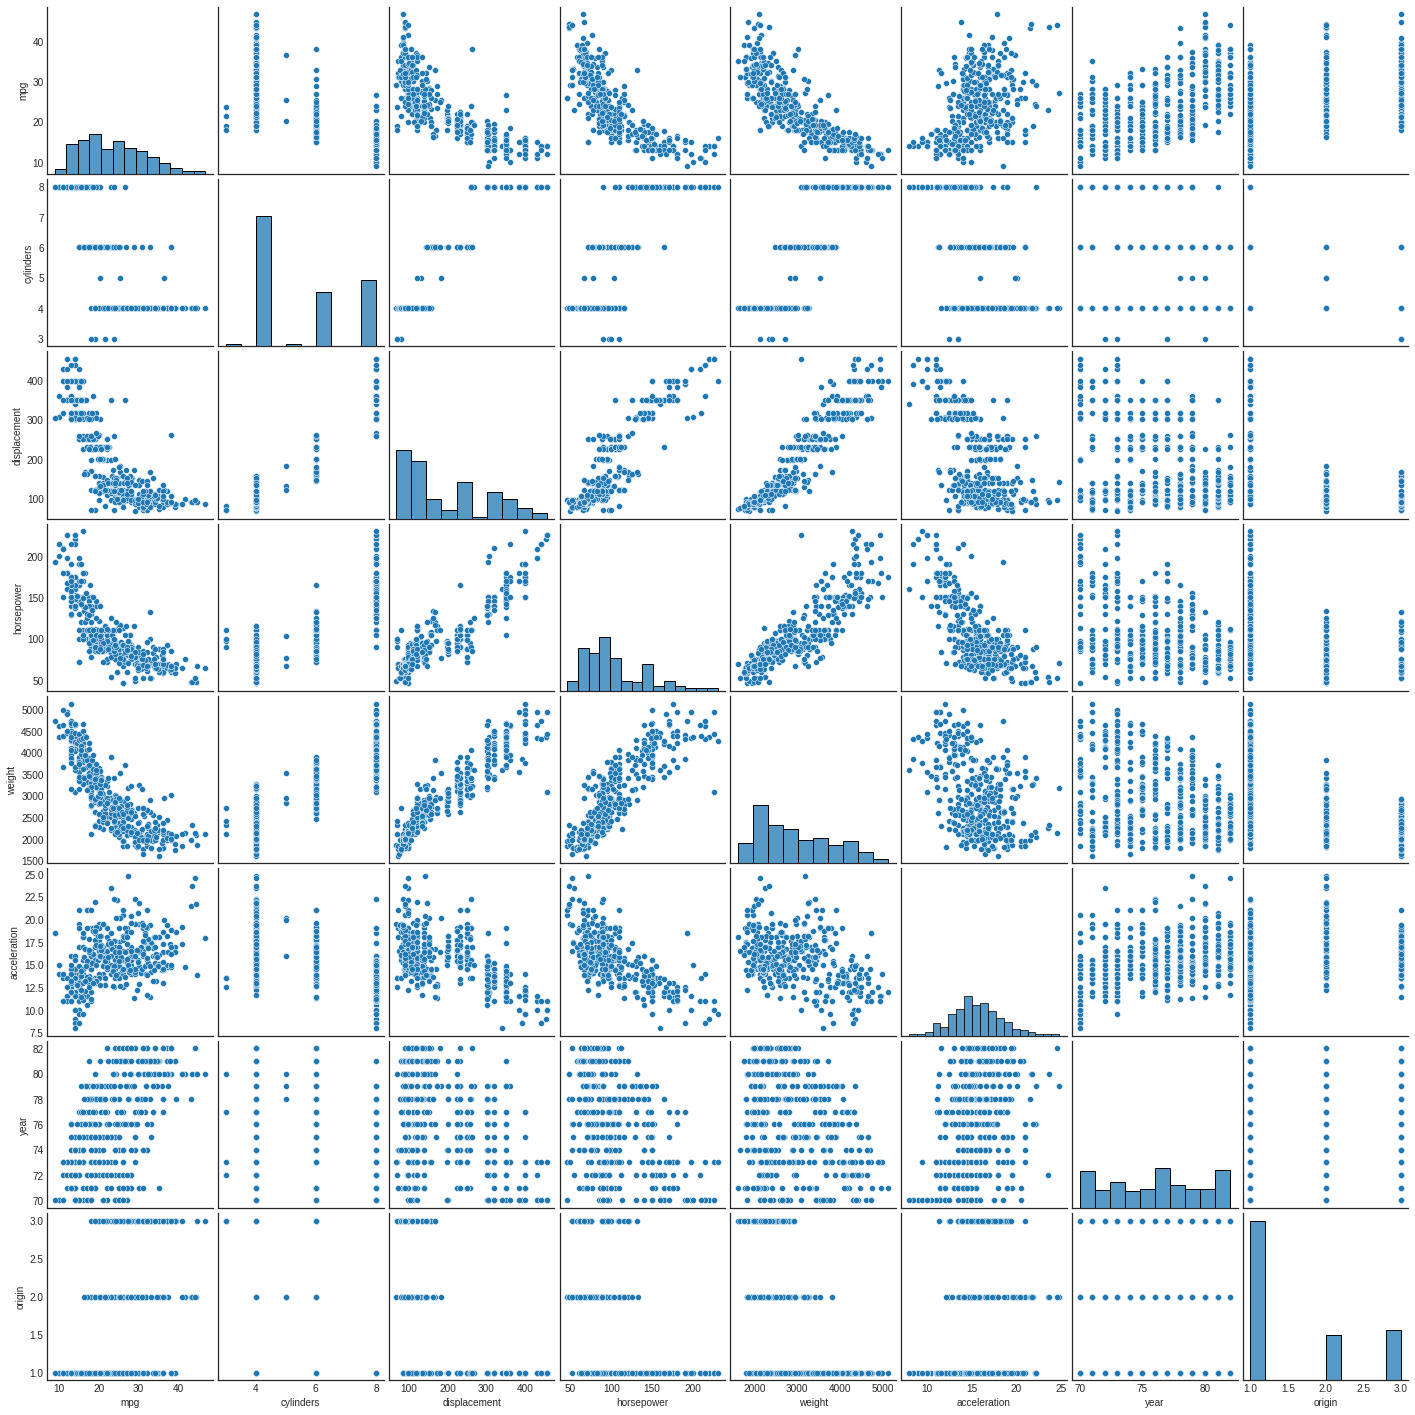

In [6]:
sns.pairplot(auto) #We can drop & ignore the categorical variable origin

In [7]:
auto.shape

(397, 8)

#Answer
2.1 Plotted Pairplot graph for all the numeric values above.
2.2 

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


##Answer
3. Correlation Matrix for MPG vs cylinders, displacement, horsepower, weight, acceleration, year and origin has been plotted.
High Correlation of MPG with Cylinders, displacement, horsepower & weight.

Here in the above matrix we can say that - weight is highly correlated negatively with mpg as -> mpg increases with decreased weight of the vehicle.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.core import resample

In [46]:
stm1 = smf.ols('mpg ~ weight + C(origin) - 1', auto).fit() #eliminating the intercept on weight
print(stm1.summary().tables[1])
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto)
#Here the value of SSR is higher than the intercept one/ therefore removing intercept model will not be a great fit.

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(origin)[1]    43.6896      1.107     39.481      0.000      41.514      45.865
C(origin)[2]    44.9086      0.928     48.418      0.000      43.085      46.732
C(origin)[3]    46.0488      0.857     53.717      0.000      44.363      47.734
weight          -0.0070      0.000    -22.021      0.000      -0.008      -0.006


1276066.8156169832

In [45]:
# Defining - highest correlated variable - mpg ~ weight
stm1 = smf.ols('mpg ~ weight + C(origin)', auto).fit()
print(stm1.summary().tables[1])
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto) #sum of squared residuals

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.6896      1.107     39.481      0.000      41.514      45.865
C(origin)[T.2]     1.2190      0.654      1.865      0.063      -0.066       2.504
C(origin)[T.3]     2.3592      0.663      3.556      0.000       1.055       3.663
weight            -0.0070      0.000    -22.021      0.000      -0.008      -0.006


2388.3000667868027

In [15]:
((auto.mpg - stm1.predict(auto.weight))**2).sum()/len(auto)

18.828245990051975

In [51]:
stm1 = smf.ols('mpg ~ displacement + C(origin)', auto).fit()
print(stm1.summary().tables[1])
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto) #sum of squared residuals

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.9634      0.776     43.741      0.000      32.437      35.490
C(origin)[T.2]     0.0842      0.740      0.114      0.909      -1.370       1.539
C(origin)[T.3]     2.2805      0.727      3.137      0.002       0.851       3.710
displacement      -0.0564      0.003    -19.306      0.000      -0.062      -0.051


205.68793632655797

In [48]:
stm1 = smf.ols('mpg ~ cylinders + C(origin)', auto).fit()
print(stm1.summary().tables[1])
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto) #sum of squared residuals

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6799      1.158     34.270      0.000      37.403      41.956
C(origin)[T.2]     1.2369      0.750      1.648      0.100      -0.238       2.712
C(origin)[T.3]     3.6211      0.730      4.959      0.000       2.186       5.057
cylinders         -3.1333      0.178    -17.554      0.000      -3.484      -2.782


2051.1327367384783

In [49]:
#multilinear regression
stm1 = smf.ols('mpg ~ weight + displacement + cylinders + C(origin)', auto).fit()
print(stm1.summary())
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto) #sum of squared residuals

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.96e-101
Time:                        03:53:44   Log-Likelihood:                -1136.9
No. Observations:                 397   AIC:                             2286.
Df Residuals:                     391   BIC:                             2310.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.0292      1.551     27.

1340.8076927439615

In [26]:
#Treating 'year' as categorical variable with numeric variable 
stm1 = smf.ols('mpg ~ weight + displacement + cylinders + C(year)', auto).fit()
print(stm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          4.82e-142
Time:                        03:27:26   Log-Likelihood:                -1013.9
No. Observations:                 397   AIC:                             2060.
Df Residuals:                     381   BIC:                             2124.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.0821      1.223     31.949

#Answers

4.1 Significant effects is being portrayed with mpg ~ weight with least P>|t| value and the expected mean value of Y when all X=0 is also highest, 
  
4.1.1 - If we eliminate the intercept the RSS seems to be way higher which is a poor fit model into data.
  
4.1.2 - We can also see that in weight - under 2nd Origin as European cars with weight show slightly less accuracy then American & Japanese Origin cars since the European cars have higher P value compared to other origin cars as 
  A high P-value is also called an insignificant P-value.




4.2 Variables: with higher P value have insignificant effect on mpg like 
   
    4.2.1 C(origin)[T.2]      0.909
   
    4.2.2 C(origin)[T.2]      0.100 

 & with acceleration - 0.422297 & year -	0.581469	-> Correlation




4.3 Difference in results 
: We can see the R-Sqaure value has been increased - to 0.842 from 0.706 & with increased P value in T.72 an T.73 as C(year)

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [97]:
#1st Reg -> mpg~cylinders
stm1 = smf.ols('mpg ~ cylinders + C(origin)',auto).fit() #from Q4
print(stm1.summary().tables[1])
print(stm1.summary())

stm1 = smf.ols('mpg ~ cylinders + C(origin) + cylinders*C(origin)', auto).fit()
print(stm1.summary().tables[1])
print(stm1.summary())
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto) #sum of squared residuals

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6799      1.158     34.270      0.000      37.403      41.956
C(origin)[T.2]     1.2369      0.750      1.648      0.100      -0.238       2.712
C(origin)[T.3]     3.6211      0.730      4.959      0.000       2.186       5.057
cylinders         -3.1333      0.178    -17.554      0.000      -3.484      -2.782
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     219.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.28e-83
Time:                        05:09:45   Log-Likelihood:                -1184.3
No. Observations:           

8990.346040478114

In [96]:
#2nd Reg -> mpg~displacement

stm1 = smf.ols('mpg ~ displacement + C(origin)', auto).fit()
print(stm1.summary().tables[1])
print(stm1.summary())

stm1 = smf.ols('mpg ~ displacement + C(origin) + displacement*C(origin)', auto).fit()
print(stm1.summary().tables[1])
print(stm1.summary())
((auto.mpg - (stm1.params[0] + stm1.params[1]*auto.mpg))**2).sum()/len(auto)

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.9634      0.776     43.741      0.000      32.437      35.490
C(origin)[T.2]     0.0842      0.740      0.114      0.909      -1.370       1.539
C(origin)[T.3]     2.2805      0.727      3.137      0.002       0.851       3.710
displacement      -0.0564      0.003    -19.306      0.000      -0.062      -0.051
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     251.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.99e-91
Time:                        05:09:32   Log-Likelihood:                -1166.8
No. Observations:           

78474.19577090572

Answer 5 -

Displacement*origin - T2,T3, & Intercept appears to be very less P Value - 

but

Coef - beta value of T.3 (0.042) < 0.059 P Value, to which the p value should 

be lesser than coef for Japanese cars the displacement*origin model doesnot 

appear to be significant but for T.1 & T.2 it is significant.



In [104]:
#3rd Regression -> mpg ~ acceleration + weight + cylinders + acceleration*weight*cylinders + C(origin)
stm1 = smf.ols('mpg ~ acceleration + weight + cylinders + acceleration*weight*cylinders*C(origin)', auto).fit()
print(stm1.summary().tables[1])
print(stm1.summary())


                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      171.9704     41.205      4.174      0.000      90.948     252.993
C(origin)[T.2]                                 319.7500    549.266      0.582      0.561    -760.296    1399.796
C(origin)[T.3]                                 856.8553   1250.096      0.685      0.493   -1601.264    3314.974
acceleration                                    -6.4841      2.492     -2.602      0.010     -11.383      -1.585
acceleration:C(origin)[T.2]                    -21.2615     32.529     -0.654      0.514     -85.225      42.702
acceleration:C(origin)[T.3]                    -76.5539     92.862     -0.824      0.410    -259.153     106.046
weight                                          -0.0423      0.016     -2.650      0.008      -0

Answer 5 - 

RSq - appears to be 0.782

& Again for European & Japanese origin cars the acceleration P value appears to be at higher end, which is a bad fit data model when compared to all other numeric variables.

Weight without the origin T.2 & T.3 appears to be Significant with 
weight 0.008, having max correlation for regression.


## Q6. Measure the in-sample and out of sample $R^2$ of the model estimated in Q4.1 using 20% data for testing. **(10 points total)**

In [112]:
stm1 = smf.ols('mpg ~ weight + C(origin)', auto).fit()
print(stm1.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.6896      1.107     39.481      0.000      41.514      45.865
C(origin)[T.2]     1.2190      0.654      1.865      0.063      -0.066       2.504
C(origin)[T.3]     2.3592      0.663      3.556      0.000       1.055       3.663
weight            -0.0070      0.000    -22.021      0.000      -0.008      -0.006


In [113]:
from sklearn.model_selection import train_test_split
D_train, D_test = train_test_split(auto, test_size = 0.2, random_state=0)
est = smf.ols('mpg ~ weight + C(origin)', D_train).fit()
print('in-sample r-square: {:.2f}'.format(est.rsquared))
predictions = est.predict(D_test) # automatically transforms the test data per the formula, i.e., calls the log and square etc.
print('out-of-sample r-square: {:.2f}'.format(r2_score(D_test.mpg, predictions)))

in-sample r-square: 0.68
out-of-sample r-square: 0.78


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? 

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 

Sample answer: I discussed with Hazel for this homework. I needed her help with gradescope and as a sounding board for the reasonableness of this homework.